In [3]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%watermark --iversions

pandas    : 1.4.1
numpy     : 1.22.2
matplotlib: 3.5.1



**WW-site**
- sampleTypeDefault (rawWW, NA or pstGrit after treatments headworks)
- sampleCollectionDefault (TP time proportional; FP flow proportional)

**WW-measure**
- sampleID (locationID : date) 
- type (SARS-CoV-2 nucleocapsid gene N1 or N2; Pepper mild mottle virus)

**WW-site_measure**
- uSiteMeasureID (tss, flow, tmp, pH)

**WW-polygon**
- pop - population

In [12]:
df = pd.read_csv('data/WW-measure.csv')
df.head()

,uWWMeasureID,reportDate,sampleID,type,value,unit,fractionAnalyzed,aggregation,qualityFlag,reporterID,...,accessToProvHA,accessToOtherProv,analysisDate,typeOther,unitOther,aggregationOther,index,accessToSelf,accessToDetails,notes
0,covN1TAB,2021-04-09,TAB_20210401,covN1,52.530044,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,covN1TAB,2021-04-09,TAB_20210404,covN1,74.892574,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,covN1THC,2021-04-09,THC_20210401,covN1,141.213565,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,covN1THC,2021-04-09,THC_20210404,covN1,150.366354,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,covN1THU,2021-04-09,THU_20210401,covN1,53.621250,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(df['type'].unique())
print(df['uWWMeasureID'].unique())
print(df['unit'].unique())

['covN1' 'covN2' 'nPPMoV']
['covN1TAB' 'covN1THC' 'covN1THU' 'covN1TNT' 'covN1EGB' 'covN1VAI'
 'covN1VII' 'covN1VLG' 'covN1VLI' 'covN1VNL' 'covN1MMN' 'covN1MMS'
 'covN1HDA' 'covN1HHA' 'covN1HMC' 'covN2TAB' 'covN2THC' 'covN2THU'
 'covN2TNT' 'covN2EGB' 'covN2VAI' 'covN2VII' 'covN2VLG' 'covN2VLI'
 'covN2VNL' 'covN2MMN' 'covN2MMS' 'covN2HDA' 'covN2HHA' 'covN2HMC'
 'PPMoVTAB' 'PPMoVTHC' 'PPMoVTHU' 'PPMoVTNT' 'PPMoVEGB' 'PPMoVVAI'
 'PPMoVVII' 'PPMoVVLG' 'PPMoVVLI' 'PPMoVVNL' 'PPMoVMMN' 'PPMoVMMS'
 'PPMoVHDA' 'PPMoVHHA' 'PPMoVHMC']
['gcML']


<AxesSubplot:>

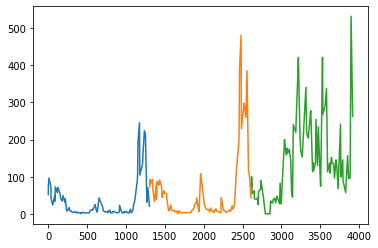

In [53]:
## N1, N2 and PPMV are sequential
#df2 = df[df['uWWMeasureID'].apply(lambda ch: 'N2TAB' in ch)]

df[df['uWWMeasureID'] == 'covN1TAB']['value'].plot()
df[df['uWWMeasureID'] == 'covN2TAB']['value'].plot()
df[df['uWWMeasureID'] == 'PPMoVTAB']['value'].apply(lambda i: i / 1000.).plot()

In [43]:
df[df['uWWMeasureID'].apply(lambda ch: 'TAB' in ch)]

,uWWMeasureID,reportDate,sampleID,type,value,unit,fractionAnalyzed,aggregation,qualityFlag,reporterID,...,accessToProvHA,accessToOtherProv,analysisDate,typeOther,unitOther,aggregationOther,index,accessToSelf,accessToDetails,notes
0,covN1TAB,2021-04-09,TAB_20210401,covN1,52.530044,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,covN1TAB,2021-04-09,TAB_20210404,covN1,74.892574,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,covN1TAB,2021-04-13,TAB_20210406,covN1,96.763794,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,covN1TAB,2021-04-16,TAB_20210408,covN1,71.093454,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,covN1TAB,2021-04-16,TAB_20210411,covN1,41.551361,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,PPMoVTAB,2022-01-24,TAB_20220116,nPPMoV,156623.340820,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3866,PPMoVTAB,2022-01-26,TAB_20220118,nPPMoV,95309.438239,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3885,PPMoVTAB,2022-01-31,TAB_20220123,nPPMoV,97003.112536,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3898,PPMoVTAB,2022-02-02,TAB_20220125,nPPMoV,531529.770480,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
